## 1. Business Understanding
### 1.1 Business Overview
In the modern technology era, social media platforms such as Twoter(x) have become powerful soaces where users share real-time opinions on brands and products. Companies such as Apple and Google, both global leaders  in technology and innovation, benefit greatly from understanding these public sentiments. Analyzing tweets about them helps reveal consumer opinions, trends and brand perceptions. Since manually reviewing  thousands of tweets is inefficient, automated sentiment analysis provides an effective solution. Classifing tweets as positive,negative or neutral to help companies monitor reputation, improve customer satisfaction  and make informed strategic decisions

### 1.2 Problem Statement
In odays digital era, social media platforms like Twitter(x) have becomes key spaces where people share their opinions about brands and products. For global technology companies like Apple and Google, these tweets offer valuable insights into customer satisfaction, brand reputation and customer loyalty. However, the large volume of unstructured data makes it difficult to manually analyze the oublics sentiment in real time. To solve this problem, this project aims at developing an automated sentiment analysis model using Natural Language Processing(NLP) to classify tweets as positive, negative or neutral. This will help the companies better understand consumer perception, respond to feedback quickly and generally improve their products and overall Brand Image
### 1.3 Business Objectives 
 ### Main Objective
To build a model that can rate the sentiment of a Tweet based on its content
 ### Specific Objectives
To establish patterns and relationships between tweet content and corresponding sentiment categories.

To identify whether the special characters portray meaningful info. characters #,@ and lin
kCompare model results using metrics such as accuracy, precision, recall and F-1 score to identify the best-performing model.

Analyze a lot of tweets to find out what emotional patterns are popular and whether people's perceptions of Apple and Google products are changing.

Recognize the Main Sentiment Drivers: To determine which words, phrases, or subjects have the greatest influence on whether people see a brand favoly or unfavorably

### Research Questions
1. What patterns and relationships exist between content and their correspondiing sentiment categories?
2. Do special characters suc as #,@ and links carry any meaningful information that affects tweet sentiment:?
3. What specific products, features or topics are the main targets of users' emotions towards  Apple and Google?
4. Which machine learning model performs the best in classfying tweet sentiment based on metrics such as accuracy, precision, recall and F1-score?
5. SWhat are the main words, phrases or themes that drive positove ir negative sentiment towards these brands , and how do these patterns change over time?

### 1.4. Success Criteria
The project will be successful if it develops an accurate and reliable sentiment classification model that achieves an average F1-score of above 0.80 and maintains balanced precision and recall across all sentiment categories.
Success will also be measured by the models ability to generaliz well to unseen data, minimize misclassification between positive and negative tweets and provide actionable insights that help improve customer service and management of the brand.rab



## 2.0 Data Understanding
### 2.1 Data source and Description
- **Source:** This dataset is from CrowdFlower via data.world containing human raters sentiments. For more insights about the dataset you can follow this link https://data.world/crowdflower/brands-and-product-emotions.

- **Description** The dataset has sentiments from over 9000 twitter users with each row containing a  users tweet_text, emotion_in_tweet_is_directed_at and emotion. Our main target is to use the text and train our model to predict the emotion from the text.


### 2.2 Data Loading
1. Import necessary libraries
2. Load Dataset

In [5]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Loading Dataset 
df = pd.read_csv(r"C:/Users/kabif/Downloads/tweet_product_company.csv", encoding='ISO-8859-1')

### 2.3 Data Exploration


In [7]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [8]:
df.shape

(9093, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Text(0.5, 1.0, 'Emotion Proportions')

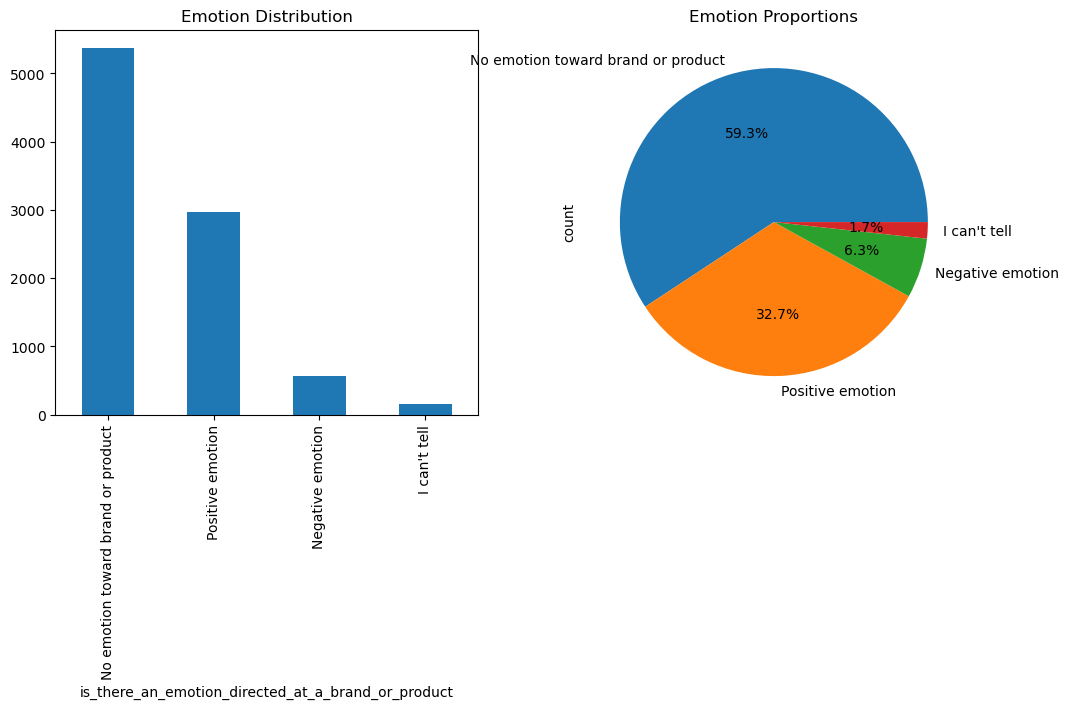

In [37]:
# Distribution of emotions in the dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.title('Emotion Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Emotion Proportions')

Missing data on where emotion is directed to: 0/9066 (0.0%)


Text(0.5, 0, 'Count')

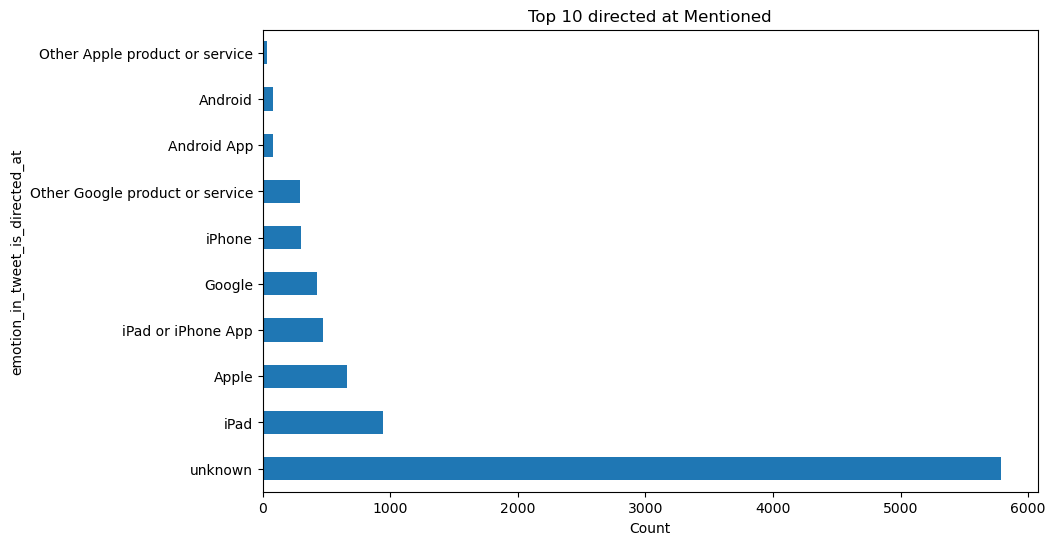

In [38]:
# Missingness analysis
missing_brand = df['emotion_in_tweet_is_directed_at'].isna().sum()
total_length = len(df)
print(f"Missing data on where emotion is directed to: {missing_brand}/{total_length} ({missing_brand/total_length:.1%})")

# Plot for the non-missing values
directed_at_counts = df['emotion_in_tweet_is_directed_at'].value_counts().head(10)
plt.figure(figsize=(10, 6))
directed_at_counts.plot(kind='barh')
plt.title('Top 10 directed at Mentioned')
plt.xlabel('Count')

In [10]:
# checking for miaaing values 
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

We have missing values in tweet-text and emotion_in_tweet columns.

In [11]:
# checking for duplicates
df.duplicated().sum()

22

In [13]:
# drop duplicates 
df.drop_duplicates(inplace=True)

In [14]:
df['tweet_text'].duplicated().sum()

5

In [15]:
df.drop_duplicates(subset=['tweet_text'],inplace=True)

In [16]:
df.duplicated().sum()

0

In [18]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].isna().sum()

0

In [19]:
df['emotion_in_tweet_is_directed_at'].isna().sum()

5786

In [21]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: count, dtype: int64

In [26]:
df['emotion_in_tweet_is_directed_at'].fillna('unknown',inplace=True)


In [25]:
df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [27]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
unknown                            5786
iPad                                943
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [28]:
df['tweet_text'].isna().sum()

1

In [30]:
missing_val = df['tweet_text'].mode()[0]
df['tweet_text'].fillna(missing_val,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9066 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9066 non-null   object
 1   emotion_in_tweet_is_directed_at                     9066 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9066 non-null   object
dtypes: object(3)
memory usage: 283.3+ KB


In [33]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5373
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [36]:
# Calculating character count
df['char_count'] = df['tweet_text'].str.len()

# Calculating word count
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
print(df[['tweet_text', 'char_count', 'word_count']])

                                             tweet_text  char_count  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127   
1     @jessedee Know about @fludapp ? Awesome iPad/i...         139   
2     @swonderlin Can not wait for #iPad 2 also. The...          79   
3     @sxsw I hope this year's festival isn't as cra...          82   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...         131   
...                                                 ...         ...   
9088                      Ipad everywhere. #SXSW {link}          29   
9089  Wave, buzz... RT @mention We interrupt your re...         125   
9090  Google's Zeiger, a physician never reported po...         145   
9091  Some Verizon iPhone customers complained their...         140   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...         104   

      word_count  
0             23  
1             22  
2             15  
3             15  
4             17  
...          ...  
9088          

In [43]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Define the text cleaning function 
def clean_text_with_stemming(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove URLs, mentions, and hashtags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)

    # 3. Tokenize using RegexpTokenizer (removes punctuation)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 5. Apply Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(stemmed_tokens)

# Apply the new cleaning function to the 'tweet_text' column
df['cleaned_text'] = df['tweet_text'].apply(clean_text_with_stemming)